<a href="https://colab.research.google.com/github/daniel-garciasoto/fraud_detection/blob/main/notebooks/01_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **Credit Card Fraud Detection - 01: Data Exploration**
---


# 1. INITIAL SETUP


---




In [4]:
# Install libraries (uncomment if needed)
# !pip install pandas numpy matplotlib seaborn scikit-learn imbalanced-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

# Configuration
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Configure display options
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 3)

print("Libraries imported successfully")

Libraries imported successfully




---
# 2. DATA LOADING
---

In [5]:
# Download dataset directly from Kaggle using kagglehub
print("Downloading dataset from Kaggle...")

import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")
print("Path to dataset files:", path)

# Load dataset
import os
csv_file = os.path.join(path, 'creditcard.csv')
df = pd.read_csv(csv_file)

print(f"\n✓ Dataset loaded successfully!")
print(f"📊 Shape: {df.shape[0]:,} rows x {df.shape[1]} columns")

Path to dataset files: /root/.cache/kagglehub/datasets/mlg-ulb/creditcardfraud/versions/3

✓ Dataset loaded successfully!
📊 Shape: 284,807 rows x 31 columns


---
# 3. INITIAL INSPECTION
---

In [7]:
print("=" * 80)
print("FIRST 5 ROWS")
print("=" * 80)
display(df.head())

print("\n" + "=" * 80)
print("DATASET INFO")
print("=" * 80)
df.info()

print("\n" + "=" * 80)
print("DESCRIPTIVE STATISTICS")
print("=" * 80)
display(df.describe())

print(f"\nDataset dimensions: {df.shape[0]:,} rows x {df.shape[1]} columns")
print(f"Number of features: {df.shape[1] - 1}")
print(f"Target variable: Class")

FIRST 5 ROWS


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,0.091,-0.552,-0.618,-0.991,-0.311,1.468,-0.470,0.208,0.026,0.404,0.251,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.62,0
1,0.0,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,-0.167,1.613,1.065,0.489,-0.144,0.636,0.464,-0.115,-0.183,-0.146,-0.069,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,2.69,0
2,1.0,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,0.208,0.625,0.066,0.717,-0.166,2.346,-2.890,1.110,-0.121,-2.262,0.525,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,378.66,0
3,1.0,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,-0.055,-0.226,0.178,0.508,-0.288,-0.631,-1.060,-0.684,1.966,-1.233,-0.208,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,123.50,0
4,2.0,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,0.753,-0.823,0.538,1.346,-1.120,0.175,-0.451,-0.237,-0.038,0.803,0.409,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,69.99,0



DATASET INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000,2.848e+05,2.848e+05,2.848e+05,2.848e+05,2.848e+05,2.848e+05,2.848e+05,2.848e+05,2.848e+05,2.848e+05,2.848e+05,2.848e+05,2.848e+05,2.848e+05,2.848e+05,2.848e+05,2.848e+05,2.848e+05,2.848e+05,2.848e+05,2.848e+05,2.848e+05,2.848e+05,2.848e+05,2.848e+05,2.848e+05,2.848e+05,2.848e+05,284807.000,284807.000
mean,94813.860,1.168e-15,3.417e-16,-1.380e-15,2.074e-15,9.604e-16,1.487e-15,-5.556e-16,1.213e-16,-2.406e-15,2.239e-15,1.673e-15,-1.247e-15,8.190e-16,1.207e-15,4.887e-15,1.438e-15,-3.772e-16,9.564e-16,1.040e-15,6.406e-16,1.654e-16,-3.569e-16,2.579e-16,4.473e-15,5.341e-16,1.683e-15,-3.660e-16,-1.227e-16,88.350,0.002
std,47488.146,1.959e+00,1.651e+00,1.516e+00,1.416e+00,1.380e+00,1.332e+00,1.237e+00,1.194e+00,1.099e+00,1.089e+00,1.021e+00,9.992e-01,9.953e-01,9.586e-01,9.153e-01,8.763e-01,8.493e-01,8.382e-01,8.140e-01,7.709e-01,7.345e-01,7.257e-01,6.245e-01,6.056e-01,5.213e-01,4.822e-01,4.036e-01,3.301e-01,250.120,0.042
min,0.000,-5.641e+01,-7.272e+01,-4.833e+01,-5.683e+00,-1.137e+02,-2.616e+01,-4.356e+01,-7.322e+01,-1.343e+01,-2.459e+01,-4.797e+00,-1.868e+01,-5.792e+00,-1.921e+01,-4.499e+00,-1.413e+01,-2.516e+01,-9.499e+00,-7.214e+00,-5.450e+01,-3.483e+01,-1.093e+01,-4.481e+01,-2.837e+00,-1.030e+01,-2.605e+00,-2.257e+01,-1.543e+01,0.000,0.000
25%,54201.500,-9.204e-01,-5.985e-01,-8.904e-01,-8.486e-01,-6.916e-01,-7.683e-01,-5.541e-01,-2.086e-01,-6.431e-01,-5.354e-01,-7.625e-01,-4.056e-01,-6.485e-01,-4.256e-01,-5.829e-01,-4.680e-01,-4.837e-01,-4.988e-01,-4.563e-01,-2.117e-01,-2.284e-01,-5.424e-01,-1.618e-01,-3.546e-01,-3.171e-01,-3.270e-01,-7.084e-02,-5.296e-02,5.600,0.000
50%,84692.000,1.811e-02,6.549e-02,1.798e-01,-1.985e-02,-5.434e-02,-2.742e-01,4.010e-02,2.236e-02,-5.143e-02,-9.292e-02,-3.276e-02,1.400e-01,-1.357e-02,5.060e-02,4.807e-02,6.641e-02,-6.568e-02,-3.636e-03,3.735e-03,-6.248e-02,-2.945e-02,6.782e-03,-1.119e-02,4.098e-02,1.659e-02,-5.214e-02,1.342e-03,1.124e-02,22.000,0.000
75%,139320.500,1.316e+00,8.037e-01,1.027e+00,7.433e-01,6.119e-01,3.986e-01,5.704e-01,3.273e-01,5.971e-01,4.539e-01,7.396e-01,6.182e-01,6.625e-01,4.931e-01,6.488e-01,5.233e-01,3.997e-01,5.008e-01,4.589e-01,1.330e-01,1.864e-01,5.286e-01,1.476e-01,4.395e-01,3.507e-01,2.410e-01,9.105e-02,7.828e-02,77.165,0.000
max,172792.000,2.455e+00,2.206e+01,9.383e+00,1.688e+01,3.480e+01,7.330e+01,1.206e+02,2.001e+01,1.559e+01,2.375e+01,1.202e+01,7.848e+00,7.127e+00,1.053e+01,8.878e+00,1.732e+01,9.254e+00,5.041e+00,5.592e+00,3.942e+01,2.720e+01,1.050e+01,2.253e+01,4.585e+00,7.520e+00,3.517e+00,3.161e+01,3.385e+01,25691.160,1.000



Dataset dimensions: 284,807 rows x 31 columns
Number of features: 30
Target variable: Class


---
# 4. MISSING VALUES ANALYSIS
---

In [8]:
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing_Values': missing_values.values,
    'Percentage': missing_percent.values
})

print("\n" + "=" * 80)
print("MISSING VALUES")
print("=" * 80)
if missing_df['Missing_Values'].sum() == 0:
    print("✓ No missing values found!")
else:
    display(missing_df[missing_df['Missing_Values'] > 0])


MISSING VALUES
✓ No missing values found!




---
# 5. TARGET VARIABLE ANALYSIS (CLASS)
---


TARGET VARIABLE DISTRIBUTION
Legitimate transactions (0): 284,315 (99.8273%)
Fraudulent transactions (1): 492 (0.1727%)

Imbalance ratio: 1:578


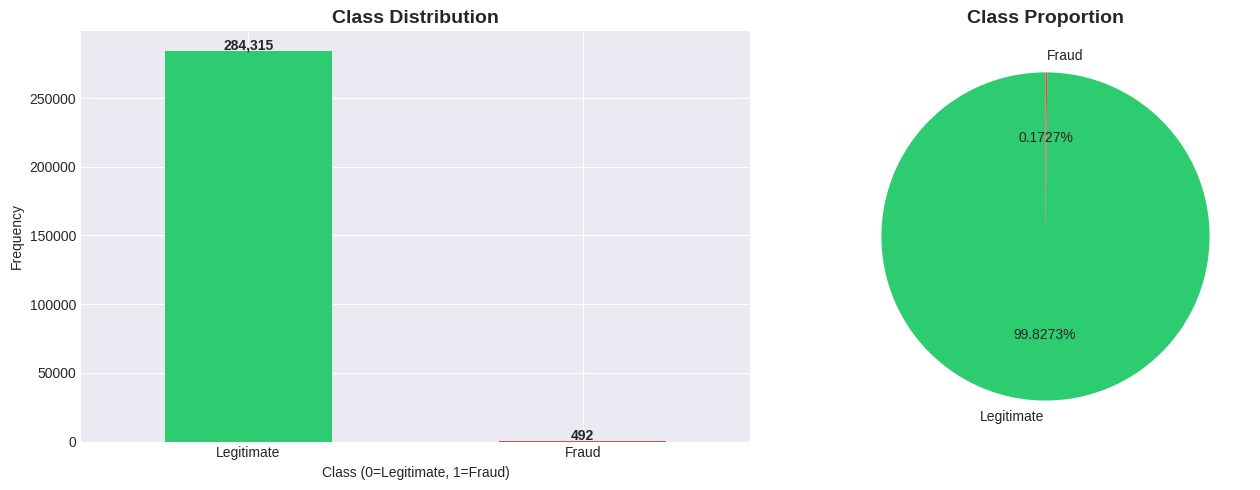

In [10]:
class_distribution = df['Class'].value_counts()
class_percentage = df['Class'].value_counts(normalize=True) * 100

print("\n" + "=" * 80)
print("TARGET VARIABLE DISTRIBUTION")
print("=" * 80)
print(f"Legitimate transactions (0): {class_distribution[0]:,} ({class_percentage[0]:.4f}%)")
print(f"Fraudulent transactions (1): {class_distribution[1]:,} ({class_percentage[1]:.4f}%)")
print(f"\nImbalance ratio: 1:{class_distribution[0]/class_distribution[1]:.0f}")

# Visualize class distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart
class_distribution.plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Class Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Class (0=Legitimate, 1=Fraud)')
axes[0].set_ylabel('Frequency')
axes[0].set_xticklabels(['Legitimate', 'Fraud'], rotation=0)

# Add values on bars
for i, v in enumerate(class_distribution):
    axes[0].text(i, v + 1000, f'{v:,}', ha='center', fontweight='bold')

# Pie chart
axes[1].pie(class_distribution, labels=['Legitimate', 'Fraud'],
            autopct='%1.4f%%', startangle=90, colors=['#2ecc71', '#e74c3c'])
axes[1].set_title('Class Proportion', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

As we can see, this dataset is **highly imbalanced**. From the almost 300,000 transactions, only 492 are fraudulent, representing just 0.1727% of the total. In an ideal scenario for machine learning, we would have a balanced distribution (50% legitimate, 50% fraud), but real-world fraud detection datasets naturally reflect this imbalance since fraudulent transactions are rare occurrences.

This severe class imbalance (ratio of 1:578) will require special handling techniques such as:
- SMOTE (Synthetic Minority Over-sampling Technique)
- Random undersampling of the majority class
- Class weight adjustments in our models
- Appropriate evaluation metrics (Precision, Recall, F1-Score, ROC-AUC instead of just Accuracy)

---
# 6. TIME VARIABLE ANALYSIS
---



'TIME' VARIABLE ANALYSIS


,Time
count,284807.000
mean,94813.860
std,47488.146
min,0.000
25%,54201.500
50%,84692.000
75%,139320.500
max,172792.000



Time range: 0.00 to 48.00 hours
Duration: ~2.0 days


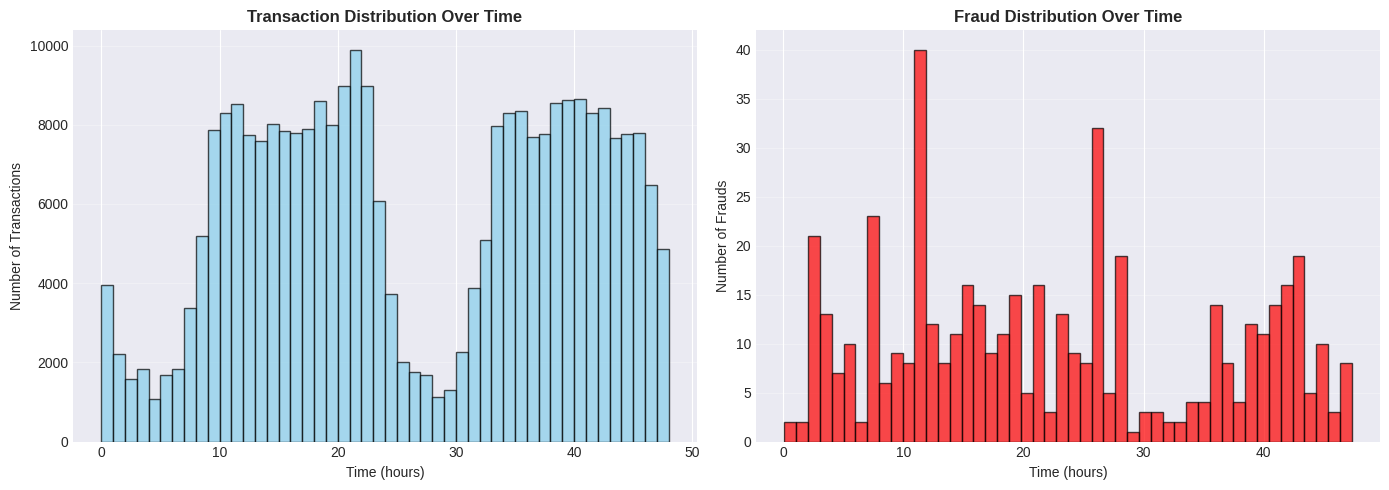

In [12]:
print("\n" + "=" * 80)
print("'TIME' VARIABLE ANALYSIS")
print("=" * 80)
display(df['Time'].describe())

# Convert Time to hours
df['Time_hours'] = df['Time'] / 3600

print(f"\nTime range: {df['Time_hours'].min():.2f} to {df['Time_hours'].max():.2f} hours")
print(f"Duration: ~{df['Time_hours'].max()/24:.1f} days")

# Visualize Time distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Transaction distribution over time
axes[0].hist(df['Time_hours'], bins=48, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].set_title('Transaction Distribution Over Time', fontweight='bold', fontsize=12)
axes[0].set_xlabel('Time (hours)')
axes[0].set_ylabel('Number of Transactions')
axes[0].grid(axis='y', alpha=0.3)

# Fraud distribution over time
fraud_time = df[df['Class'] == 1]['Time_hours']
axes[1].hist(fraud_time, bins=48, color='red', alpha=0.7, edgecolor='black')
axes[1].set_title('Fraud Distribution Over Time', fontweight='bold', fontsize=12)
axes[1].set_xlabel('Time (hours)')
axes[1].set_ylabel('Number of Frauds')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

Legitimate transactions follow expected human behavior patterns (daytime peaks, nighttime lows)
- Fraudulent transactions don't follow the same circadian rhythm, indicating potential automated/bot activity or international fraud
- The **time of day could be a valuable feature** for fraud detection models
- Off-peak hours might warrant additional monitoring despite lower overall transaction volumes

---
# 7. AMOUNT VARIABLE ANALYSIS
---

In [28]:
print("\n" + "=" * 80)
print("'AMOUNT' VARIABLE ANALYSIS")
print("=" * 80)
display(df['Amount'].describe())

print(f"\nAmount statistics:")
print(f"  - Range: ${df['Amount'].min():.2f} to ${df['Amount'].max():.2f}")
print(f"  - Median: ${df['Amount'].median():.2f}")
print(f"  - Zero amounts: {(df['Amount'] == 0).sum():,} ({(df['Amount'] == 0).sum()/len(df)*100:.2f}%)")


'AMOUNT' VARIABLE ANALYSIS


,Amount
count,284807.000
mean,88.350
std,250.120
min,0.000
25%,5.600
50%,22.000
75%,77.165
max,25691.160



Amount statistics:
  - Range: $0.00 to $25691.16
  - Median: $22.00
  - Zero amounts: 1,825 (0.64%)



AMOUNT STATISTICS BY CLASS


,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,284315.0,88.291,250.105,0.0,5.65,22.00,77.05,25691.16
1,492.0,122.211,256.683,0.0,1.00,9.25,105.89,2125.87


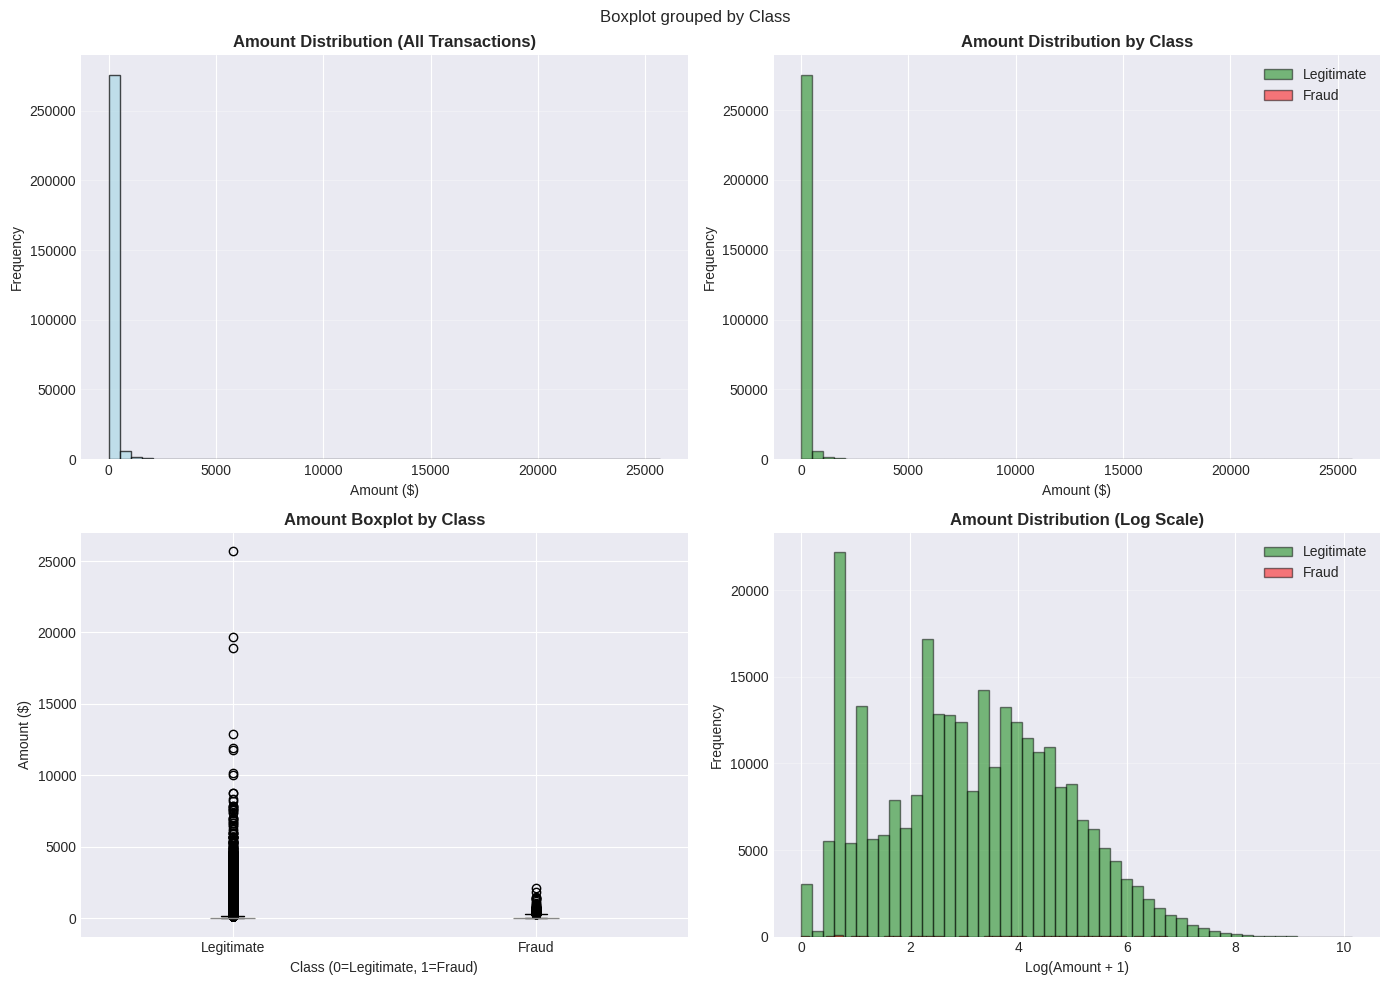

In [15]:
# Amount statistics by class
amount_by_class = df.groupby('Class')['Amount'].describe()
print("\n" + "=" * 80)
print("AMOUNT STATISTICS BY CLASS")
print("=" * 80)
display(amount_by_class)

# Visualize Amount distributions
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. General Amount distribution
axes[0, 0].hist(df['Amount'], bins=50, color='lightblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Amount Distribution (All Transactions)', fontweight='bold')
axes[0, 0].set_xlabel('Amount ($)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. Amount distribution by class (overlapped)
axes[0, 1].hist(df[df['Class'] == 0]['Amount'], bins=50,
                color='green', alpha=0.5, label='Legitimate', edgecolor='black')
axes[0, 1].hist(df[df['Class'] == 1]['Amount'], bins=50,
                color='red', alpha=0.5, label='Fraud', edgecolor='black')
axes[0, 1].set_title('Amount Distribution by Class', fontweight='bold')
axes[0, 1].set_xlabel('Amount ($)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()
axes[0, 1].grid(axis='y', alpha=0.3)

# 3. Boxplot by class
df.boxplot(column='Amount', by='Class', ax=axes[1, 0], patch_artist=True)
axes[1, 0].set_title('Amount Boxplot by Class', fontweight='bold')
axes[1, 0].set_xlabel('Class (0=Legitimate, 1=Fraud)')
axes[1, 0].set_ylabel('Amount ($)')
plt.sca(axes[1, 0])
plt.xticks([1, 2], ['Legitimate', 'Fraud'])

# 4. Log-scale histogram for better visualization
axes[1, 1].hist(np.log1p(df[df['Class'] == 0]['Amount']), bins=50,
                color='green', alpha=0.5, label='Legitimate', edgecolor='black')
axes[1, 1].hist(np.log1p(df[df['Class'] == 1]['Amount']), bins=50,
                color='red', alpha=0.5, label='Fraud', edgecolor='black')
axes[1, 1].set_title('Amount Distribution (Log Scale)', fontweight='bold')
axes[1, 1].set_xlabel('Log(Amount + 1)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

1. **Amount distributions overlap significantly** between fraud and legitimate transactions
2. **Fraudulent transactions tend to avoid extreme amounts** (fewer outliers)
3. **Log transformation recommended** for the Amount feature to normalize the distribution
4. Amount alone is **not a strong predictor**, but combined with other features it may help
5. The presence of many small-amount frauds suggests testing for **small transaction fraud patterns**


---
# 8. PCA FEATURES ANALYSIS (V1-V28)
---


PCA FEATURES ANALYSIS (28 variables)


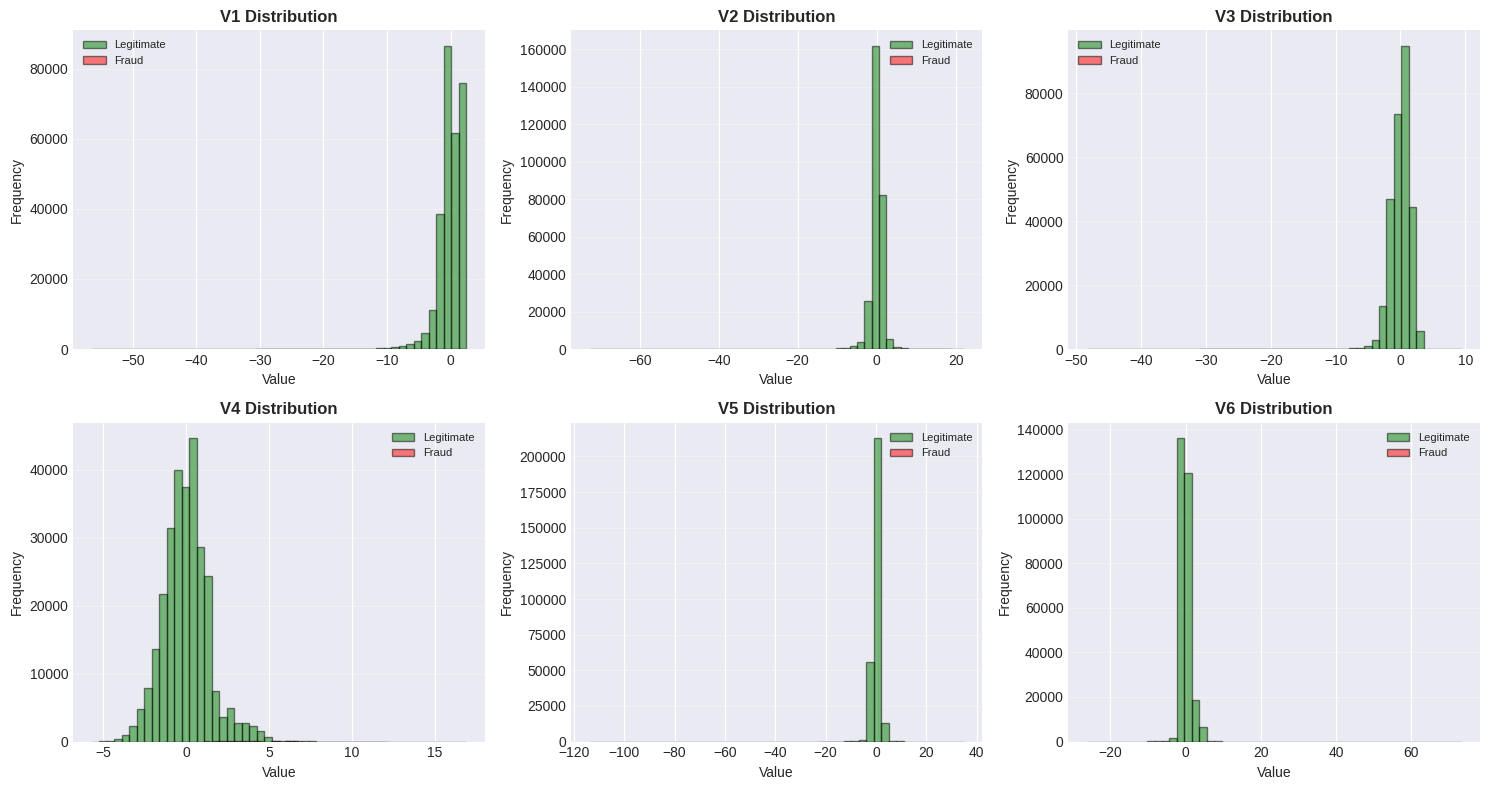

In [29]:
v_columns = [col for col in df.columns if col.startswith('V')]

print("\n" + "=" * 80)
print(f"PCA FEATURES ANALYSIS ({len(v_columns)} variables)")
print("=" * 80)

# Distribution of first 6 V variables
v_sample = v_columns[:6]

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.ravel()

for i, col in enumerate(v_sample):
    axes[i].hist(df[df['Class'] == 0][col], bins=50,
                 color='green', alpha=0.5, label='Legitimate', edgecolor='black')
    axes[i].hist(df[df['Class'] == 1][col], bins=50,
                 color='red', alpha=0.5, label='Fraud', edgecolor='black')
    axes[i].set_title(f'{col} Distribution', fontweight='bold')
    axes[i].legend(fontsize=8)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

1. **All legitimate transactions cluster tightly around 0** - this is expected after PCA normalization
2. **Fraudulent transactions must occupy the tails or different regions** of these distributions (not visible at this scale due to imbalance)
3. **V4 shows the most variance** - might capture more complex transaction patterns
4. **V2 and V5 have the sharpest peaks** - legitimate behavior is very predictable here, making deviations (fraud) more detectable
5. **These features are already normalized** (result of PCA), so no additional scaling needed for modeling
6. The fact that fraud is "invisible" in these plots actually **highlights how different fraud patterns are** - they're outliers in these distributions

---
# 9. CORRELATION ANALYSIS
---

In [19]:
# Correlation with target variable
correlations = df[v_columns + ['Amount', 'Time']].corrwith(df['Class']).sort_values(ascending=False)

print("\n" + "=" * 80)
print("TOP 10 VARIABLES MOST CORRELATED WITH FRAUD")
print("=" * 80)
print(correlations.head(10))

print("\n" + "=" * 80)
print("TOP 10 VARIABLES LEAST CORRELATED WITH FRAUD")
print("=" * 80)
print(correlations.tail(10))



TOP 10 VARIABLES MOST CORRELATED WITH FRAUD
V11       0.155
V4        0.133
V2        0.091
V21       0.040
V19       0.035
V20       0.020
V8        0.020
V27       0.018
V28       0.010
Amount    0.006
dtype: float64

TOP 10 VARIABLES LEAST CORRELATED WITH FRAUD
V9    -0.098
V1    -0.101
V18   -0.111
V7    -0.187
V3    -0.193
V16   -0.197
V10   -0.217
V12   -0.261
V14   -0.303
V17   -0.326
dtype: float64


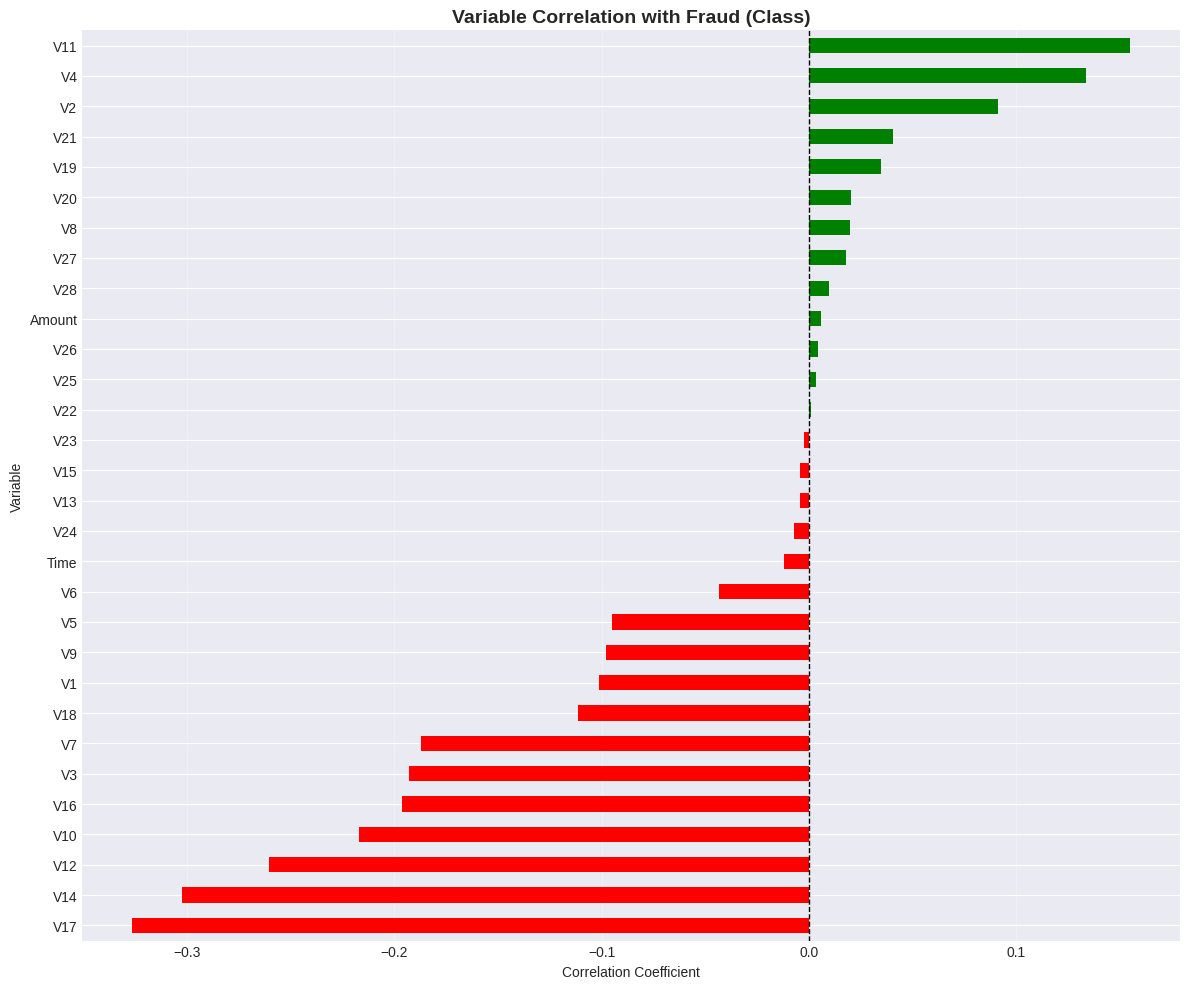

In [20]:
# Visualize correlations
plt.figure(figsize=(12, 10))
correlations.sort_values().plot(kind='barh',
                                 color=['red' if x < 0 else 'green' for x in correlations.sort_values()])
plt.title('Variable Correlation with Fraud (Class)', fontsize=14, fontweight='bold')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Variable')
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

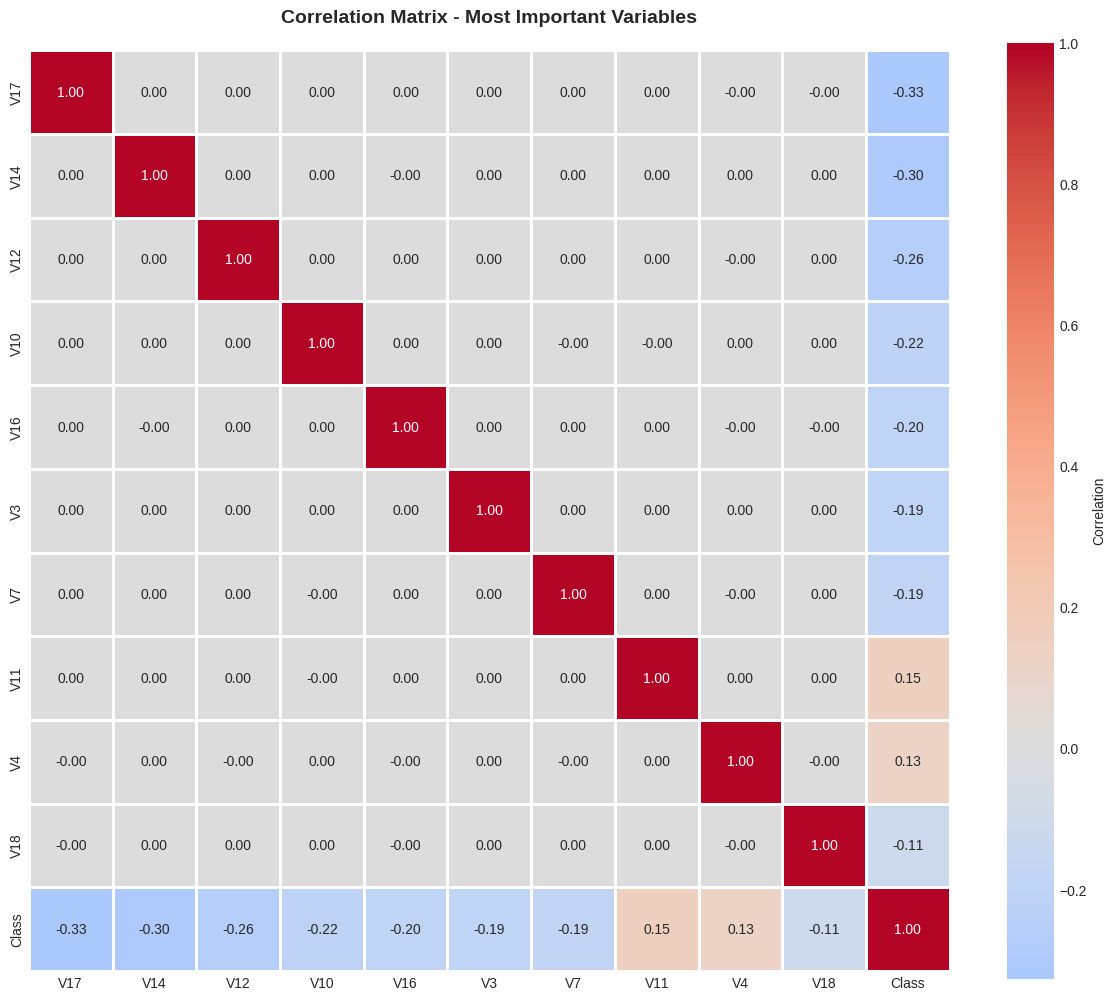

In [21]:
# Correlation matrix for most important variables
important_v = correlations.abs().sort_values(ascending=False).head(10).index.tolist()

plt.figure(figsize=(12, 10))
correlation_matrix = df[important_v + ['Class']].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={'label': 'Correlation'})
plt.title('Correlation Matrix - Most Important Variables', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

1. **Negative correlations are stronger than positive ones**
   - V17 (-0.326) is stronger than V11 (+0.155)
   - Features V17, V14, V12, V10 are more discriminative than positive correlations

2. **Amount is nearly useless as a standalone predictor (0.006)**
   - Contradicts common assumption that high amounts = fraud
   - Fraud occurs across all transaction amounts

3. **Time is not shown** - likely also has weak correlation
   - But temporal patterns (as we saw earlier) might still be useful in combination with other features

4. **Top features to prioritize in modeling:**
   - **Most important**: V17, V14, V12, V10 (negative correlations)
   - **Also important**: V11, V4, V2 (positive correlations)
   - These 7 features should drive most of the model's predictive power

5. **PCA transformation was beneficial**
   - Original features were transformed to create these uncorrelated components
   - V1-V28 capture complex patterns that individual original features couldn't

**Modeling Implications:**
- Feature selection could focus on top 10-15 correlated features
- However, ensemble models (Random Forest, XGBoost) will automatically weight important features
- The relatively low correlation values (max 0.326) suggest **no single feature is sufficient** - we need multiple features working together

---
# 10. OUTLIER DETECTION
---

In [22]:
# Outlier analysis in Amount using IQR method
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Amount'] < lower_bound) | (df['Amount'] > upper_bound)]

print("\n" + "=" * 80)
print("OUTLIER ANALYSIS IN 'AMOUNT'")
print("=" * 80)
print(f"Q1 (25th percentile): ${Q1:.2f}")
print(f"Q3 (75th percentile): ${Q3:.2f}")
print(f"IQR: ${IQR:.2f}")
print(f"Lower bound: ${lower_bound:.2f}")
print(f"Upper bound: ${upper_bound:.2f}")
print(f"\nNumber of outliers: {len(outliers):,} ({len(outliers)/len(df)*100:.2f}%)")
print(f"Outliers in frauds: {outliers['Class'].sum():,} ({outliers['Class'].sum()/len(outliers)*100:.2f}%)")
print(f"Outliers in legitimate: {len(outliers) - outliers['Class'].sum():,}")



OUTLIER ANALYSIS IN 'AMOUNT'
Q1 (25th percentile): $5.60
Q3 (75th percentile): $77.16
IQR: $71.56
Lower bound: $-101.75
Upper bound: $184.51

Number of outliers: 31,904 (11.20%)
Outliers in frauds: 91 (0.29%)
Outliers in legitimate: 31,813


**High amounts ≠ Fraud**
- Only 91 out of 492 frauds (18.5%) are outliers
- **81.5% of frauds occur within normal transaction ranges**
- Fraudsters intentionally avoid high amounts to evade detection

**Key Insights:**

1. **Fraudsters blend in** - they target typical transaction amounts to avoid triggering alerts
2. **Large purchases are usually legitimate** - customers regularly make high-value transactions
3. **Amount alone is a poor fraud predictor** - confirms the weak correlation (0.006) we saw earlier


**Bottom Line:**
Transaction amount is not a reliable fraud indicator. Focus on behavioral patterns and feature combinations instead.

---
# 11. KEY FINDINGS SUMMARY
---

In [24]:
print("\n" + "=" * 80)
print("KEY FINDINGS SUMMARY")
print("=" * 80)

summary = f"""
1. DATASET OVERVIEW:
   • Total transactions: {len(df):,}
   • Number of features: {len(df.columns) - 1}
   • Missing values: {df.isnull().sum().sum()}
   • Time span: ~{df['Time_hours'].max()/24:.1f} days

2. CLASS IMBALANCE:
   • Legitimate: {class_distribution[0]:,} ({class_percentage[0]:.4f}%)
   • Fraudulent: {class_distribution[1]:,} ({class_percentage[1]:.4f}%)
   • Imbalance ratio: 1:{class_distribution[0]/class_distribution[1]:.0f}
      Highly imbalanced - requires special handling!

3. AMOUNT VARIABLE:
   • Range: ${df['Amount'].min():.2f} - ${df['Amount'].max():,.2f}
   • Median: ${df['Amount'].median():.2f}
   • Outliers detected: {len(outliers):,} ({len(outliers)/len(df)*100:.2f}%)
   • Different distributions for fraud vs legitimate transactions

4. TIME VARIABLE:
   • Transactions span ~{df['Time_hours'].max()/24:.1f} days
   • Potential temporal patterns in fraud occurrences

5. PCA FEATURES (V1-V28):
   • Features already normalized via PCA
   • Top correlated with fraud: {correlations.head(3).index.tolist()}
   • Some features show strong separation between classes

6. NEXT STEPS:
   1. Data preprocessing (scaling Amount and Time)
   2. Handle class imbalance (SMOTE, undersampling, or class weights)
   3. Feature engineering (if needed)
   4. Model selection and training
   5. Evaluation with appropriate metrics (Precision, Recall, F1, ROC-AUC)
"""

print(summary)


KEY FINDINGS SUMMARY

1. DATASET OVERVIEW:
   • Total transactions: 284,807
   • Number of features: 31
   • Missing values: 0
   • Time span: ~2.0 days

2. CLASS IMBALANCE:
   • Legitimate: 284,315 (99.8273%)
   • Fraudulent: 492 (0.1727%)
   • Imbalance ratio: 1:578
      Highly imbalanced - requires special handling!

3. AMOUNT VARIABLE:
   • Range: $0.00 - $25,691.16
   • Median: $22.00
   • Outliers detected: 31,904 (11.20%)
   • Different distributions for fraud vs legitimate transactions

4. TIME VARIABLE:
   • Transactions span ~2.0 days
   • Potential temporal patterns in fraud occurrences

5. PCA FEATURES (V1-V28):
   • Features already normalized via PCA
   • Top correlated with fraud: ['V11', 'V4', 'V2']
   • Some features show strong separation between classes

6. NEXT STEPS:
   1. Data preprocessing (scaling Amount and Time)
   2. Handle class imbalance (SMOTE, undersampling, or class weights)
   3. Feature engineering (if needed)
   4. Model selection and training
   5.

---
# 12. SAVE EXPLORATION RESULTS
---

In [27]:
# Save key statistics
exploration_stats = {
    'total_transactions': int(len(df)),
    'fraud_transactions': int(class_distribution[1]),
    'legitimate_transactions': int(class_distribution[0]),
    'imbalance_ratio': float(class_distribution[0]/class_distribution[1]),
    'missing_values': int(df.isnull().sum().sum()),
    'features': df.columns.tolist(),
    'top_correlated_features': correlations.head(10).to_dict(),
    'amount_range': {'min': float(df['Amount'].min()), 'max': float(df['Amount'].max())},
    'time_range_hours': {'min': float(df['Time_hours'].min()), 'max': float(df['Time_hours'].max())}
}

import json
with open('exploration_stats.json', 'w') as f:
    json.dump(exploration_stats, f, indent=4)

print("\nExploration statistics saved to 'exploration_stats.json'")

# Export data for next notebook (optional - only if you added Time_hours)
# df.to_csv('data_explored.csv', index=False)
# print("✓ Data exported to 'data_explored.csv'")



Exploration statistics saved to 'exploration_stats.json'
